In [ ]:
! pip install -U kaleido
! pip install catboost

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.calibration import calibration_curve



from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import copy
import itertools

In [5]:
data = pd.read_csv('/content/Breast_Cancer.csv')

In [ ]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [ ]:
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [6]:
data.duplicated().sum()

1

This shows there's 1 row duplicated.

Removing duplicated record

In [7]:
print('Shape before dropping duplicates: ' + str(data.shape))
data.drop_duplicates(inplace=True)
print('Shape after dropping duplicates: ' + str(data.shape))

Shape before dropping duplicates: (4024, 16)
Shape after dropping duplicates: (4023, 16)


# Data Analysis

In [8]:
def pie_plot(feature_name):
  d1 = data[(data["Status"]=='Alive') & (data[f"{feature_name}"]=='Negative')]
  d2 = data[(data["Status"]=='Alive') & (data[f"{feature_name}"]=='Positive')]
  d3 = data[(data["Status"]=='Dead') & (data[f"{feature_name}"]=='Negative')]
  d4 = data[(data["Status"]=='Dead') & (data[f"{feature_name}"]=='Positive')]
  values = [(len(d1)+len(d3)), (len(d2)+len(d4))]
  values2 = [len(d1),len(d2),len(d3),len(d4)]

  #create subplots
  fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
  fig.add_trace(go.Pie(labels=[f"Negative {feature_name}",f"Positive {feature_name}"], values=values, name=''),1, 1)
  fig.add_trace(go.Pie(labels=[f'Negative {feature_name} - Survived',f'Positive {feature_name} - Survived', f"Negative {feature_name} -  Died", f"Positive {feature_name}  - Died"],values=values2, name=''), 1, 2)
  
  #set figure title, size and theme
  fig.update_layout(
    title_text=f"{feature_name} Distribution In The Dataset \
                                      {feature_name} VS Patient Status", width=1200, height=500, template="plotly_dark")


  fig.show(renderer="svg")

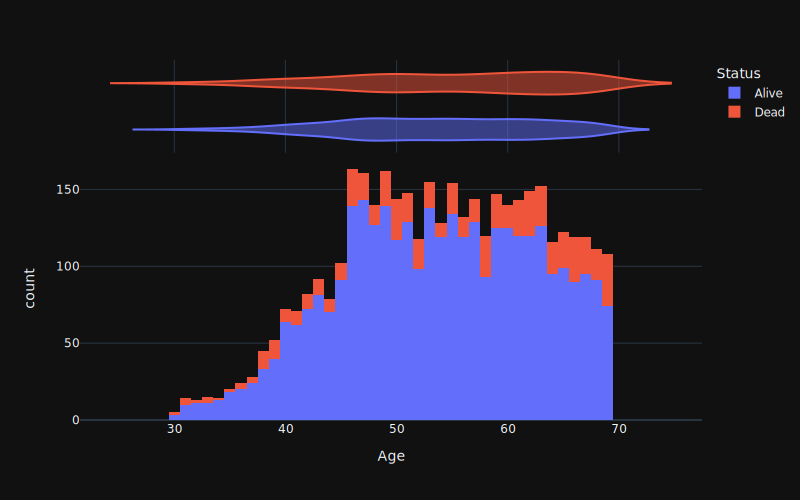

In [ ]:
fig = px.histogram(data, x="Age", color="Status", marginal="violin", hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

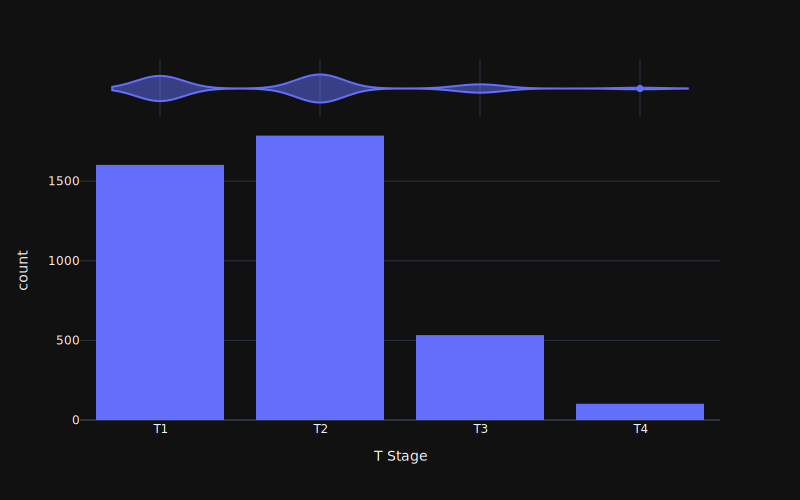

In [ ]:
fig = px.histogram(data, x="T Stage ", marginal="violin", hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

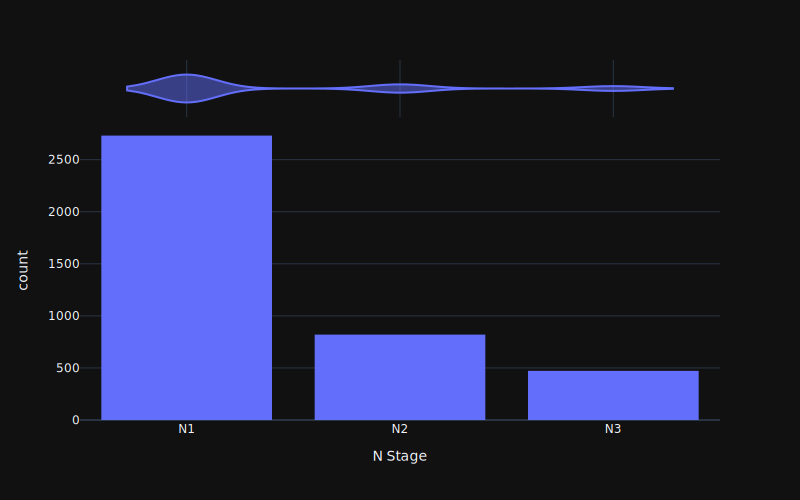

In [ ]:
fig = px.histogram(data, x="N Stage", marginal="violin", hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

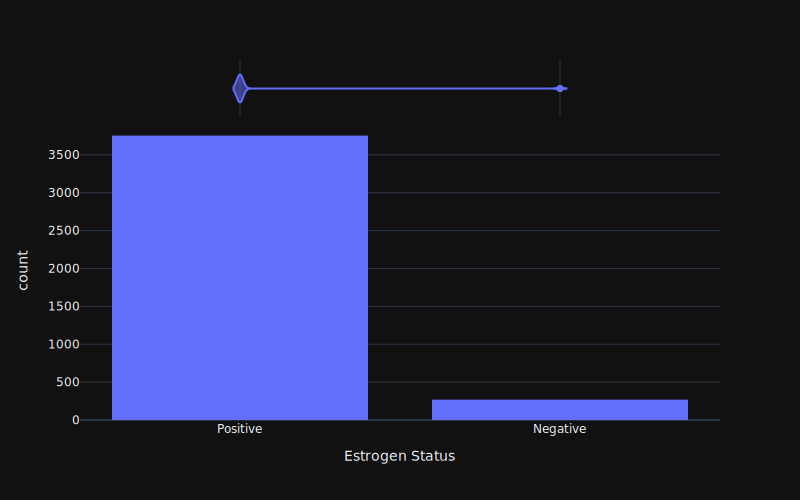

In [ ]:
fig = px.histogram(data, x="Estrogen Status", marginal="violin", hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

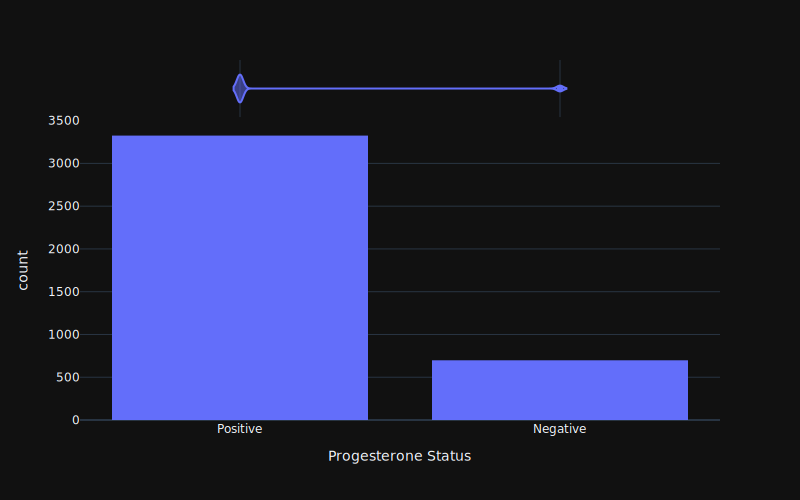

In [ ]:
fig = px.histogram(data, x="Progesterone Status", marginal="violin", hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

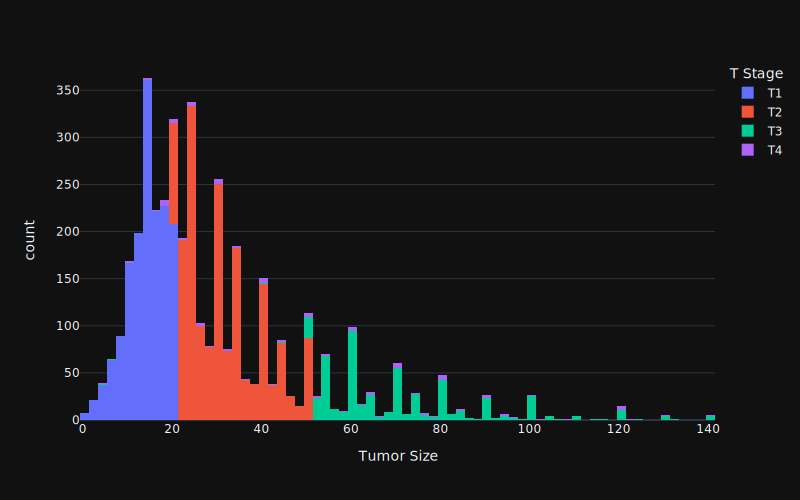

In [ ]:
fig = px.histogram(data, x="Tumor Size", color='T Stage ', hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

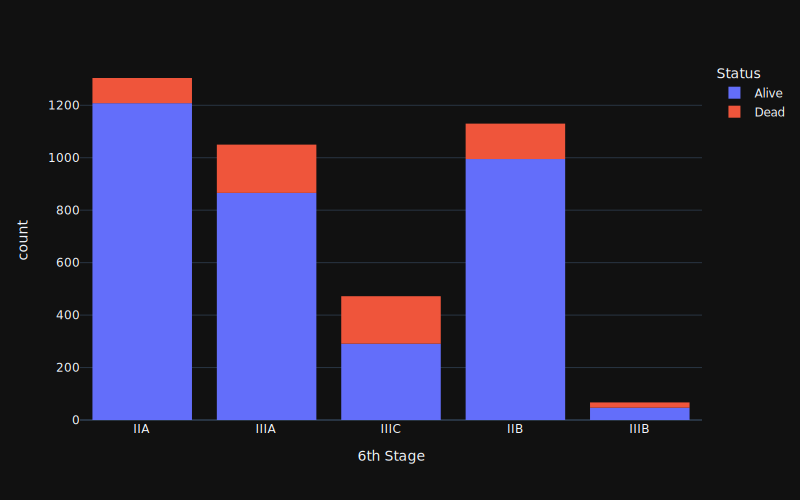

In [ ]:
fig = px.histogram(data, x="6th Stage", color='Status', hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

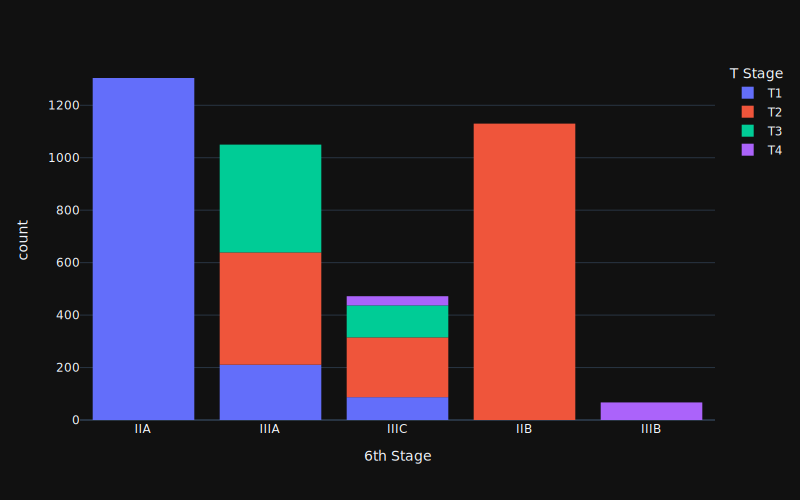

In [ ]:
fig = px.histogram(data, x="6th Stage", color='T Stage ', hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

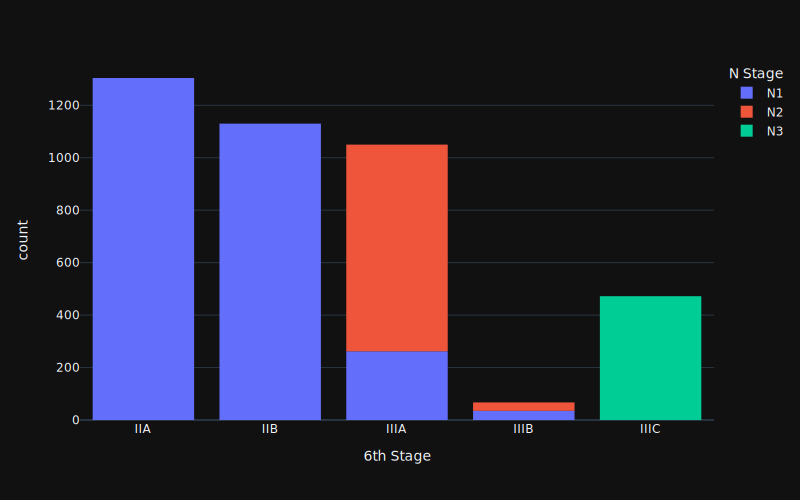

In [ ]:
fig = px.histogram(data, x="6th Stage", color='N Stage', hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

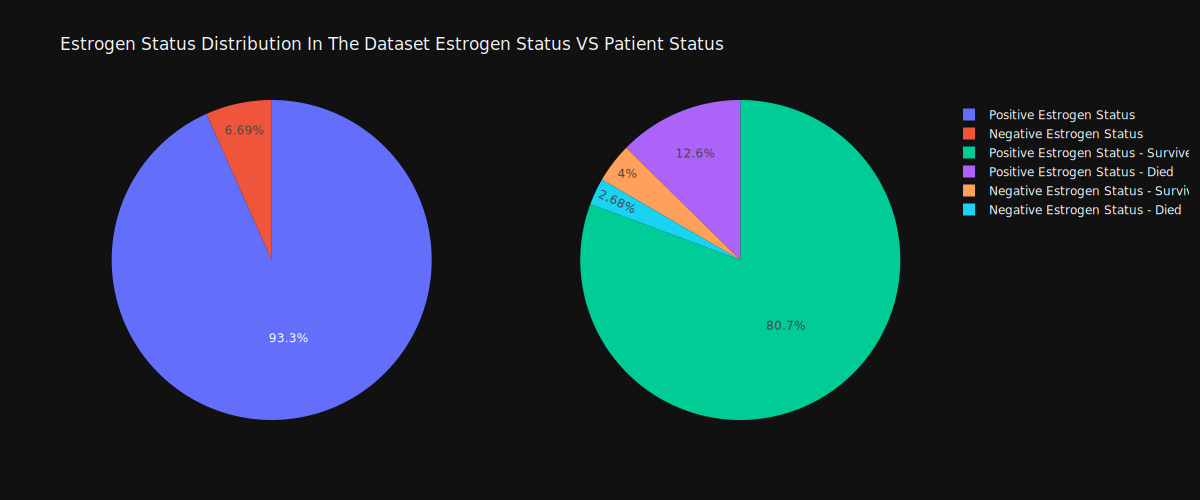

In [9]:
pie_plot('Estrogen Status')

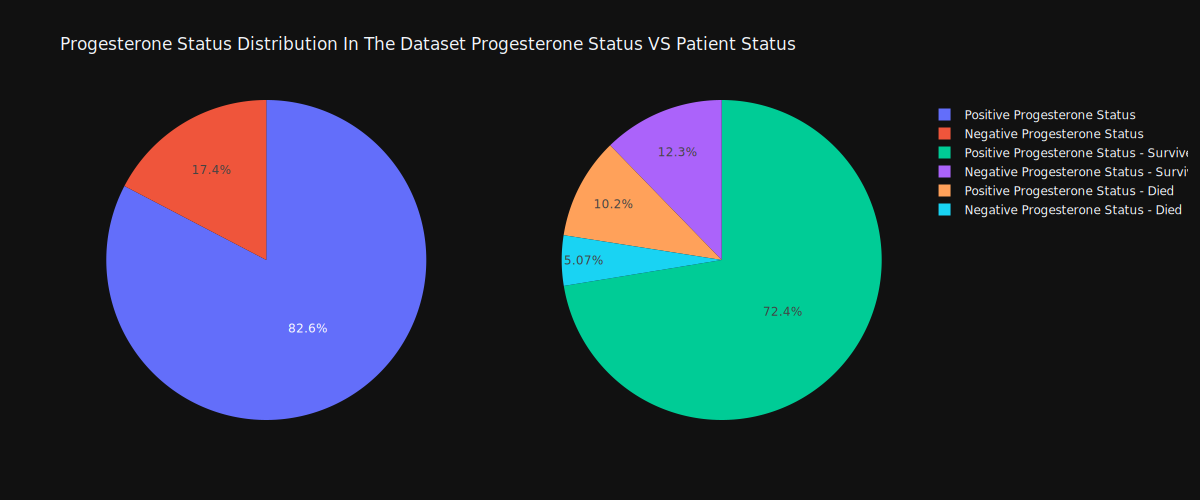

In [10]:
pie_plot('Progesterone Status')

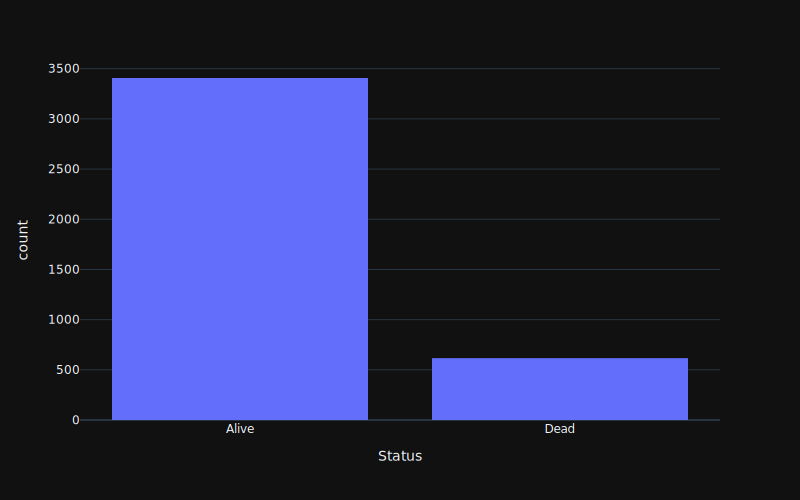

In [ ]:
fig = px.histogram(data, x="Status", hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

We can see in this graph that the data has an imbalance problem, this problem will be fixed.

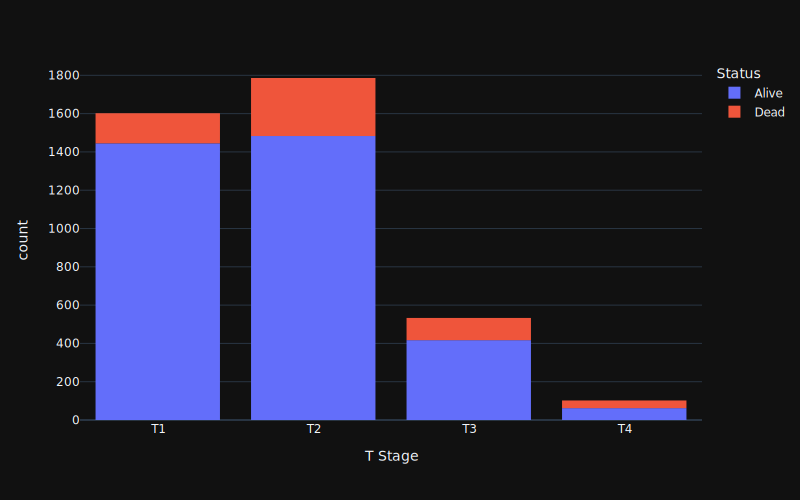

In [ ]:
fig = px.histogram(data, x="T Stage ", color='Status', hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

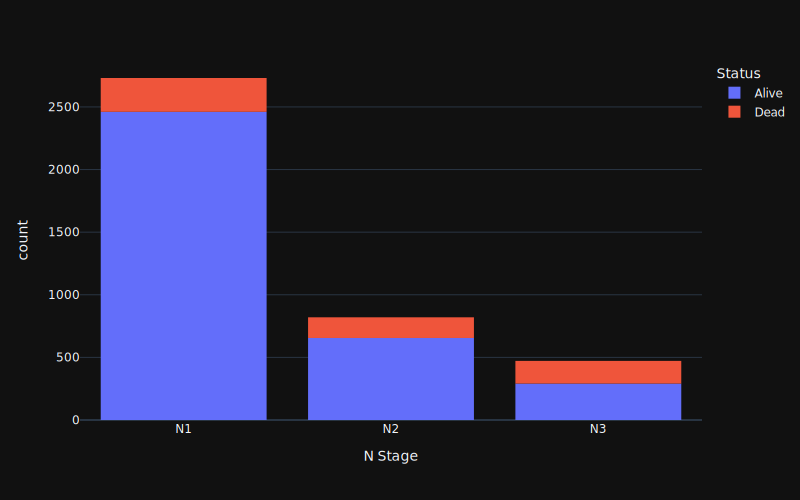

In [ ]:
fig = px.histogram(data, x="N Stage", color='Status', hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

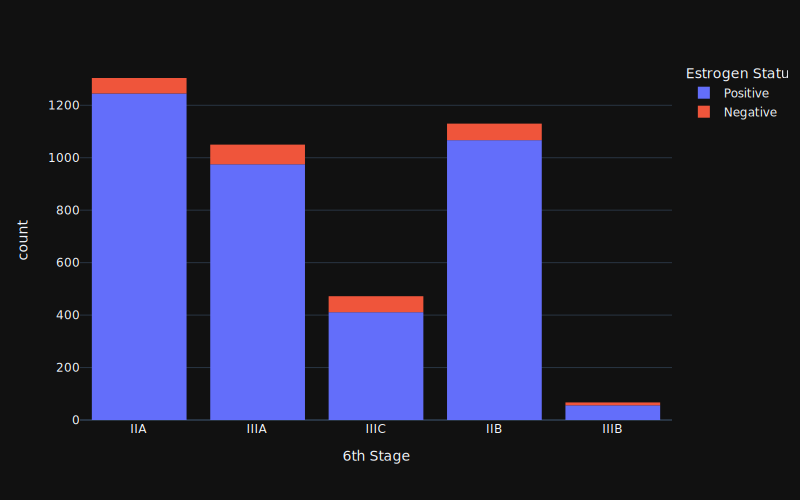

In [ ]:
fig = px.histogram(data, x="6th Stage", color='Estrogen Status', hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

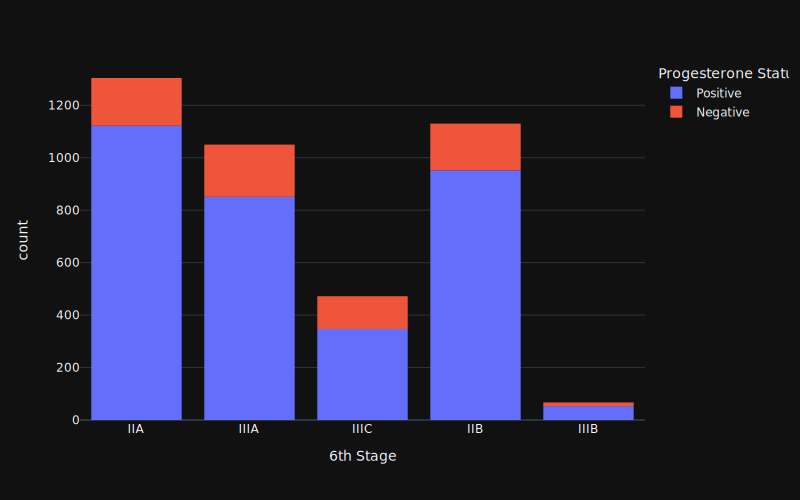

In [ ]:
fig = px.histogram(data, x="6th Stage", color='Progesterone Status', hover_data=data.columns, width=800, height=500, template="plotly_dark")
fig.show(renderer="svg")

# Data Preprocessing

## Encoding

As we seen in the first section, our data has categorical features. We'll encode these features.

In [11]:
data.select_dtypes('object').columns

Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status', 'Status'],
      dtype='object')

In [12]:
data['Race'].replace({'Other': 1, 'White': 2, 'Black': 3}, inplace=True)
data['Marital Status'].replace({'Married': 1, 'Single ': 2, 'Divorced': 3, 'Widowed': 4, 'Separated': 5}, inplace=True)
data['T Stage '].replace({'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4}, inplace=True)
data['N Stage'].replace({'N1': 1, 'N2': 2, 'N3': 3}, inplace=True)
data['6th Stage'].replace({'IIA': 1, 'IIB': 2, 'IIIA': 3, 'IIIB': 4, 'IIIC': 5}, inplace=True)
data['differentiate'].replace({'Undifferentiated': 1, 'Poorly differentiated': 2, 'Moderately differentiated': 3, 'Well differentiated': 4}, inplace=True)
data['Grade'].replace({'1': 1, '2': 2,'3': 3, ' anaplastic; Grade IV': 4}, inplace=True)
data['A Stage'].replace({'Regional': 1, 'Distant': 2}, inplace=True)
data['Estrogen Status'].replace({'Positive': 1, 'Negative': 0}, inplace=True)
data['Progesterone Status'].replace({'Positive': 1, 'Negative': 0}, inplace=True)
data['Status'].replace({'Alive': 0, 'Dead': 1}, inplace=True)

In [ ]:
data.select_dtypes('object').columns

Index([], dtype='object')

## Feature Correlation

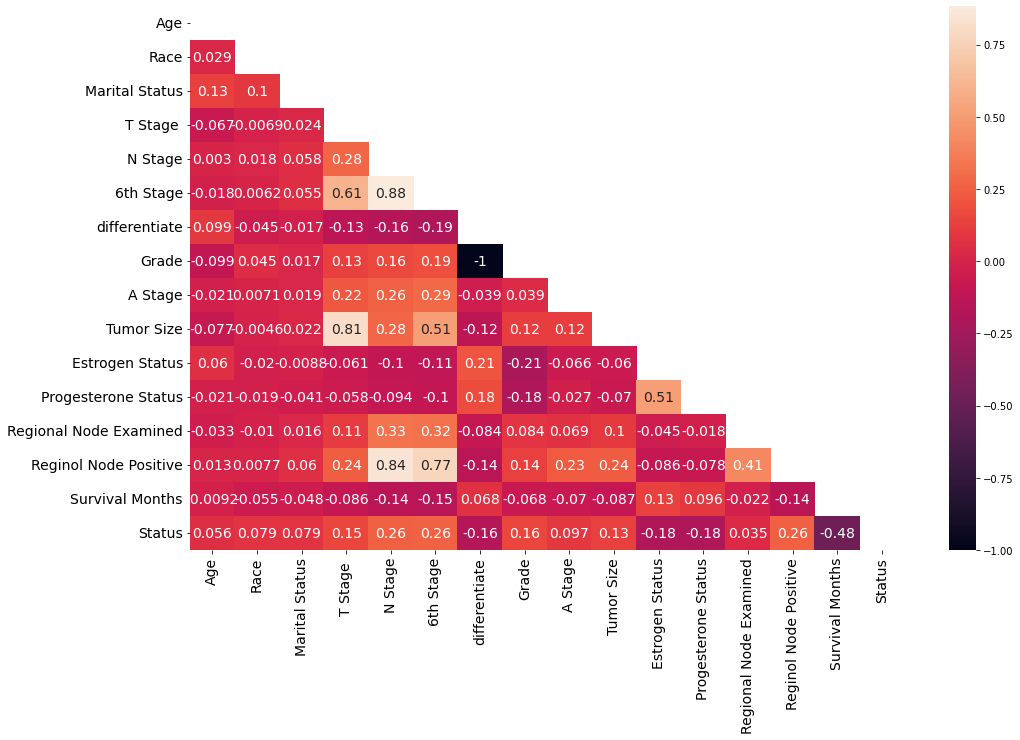

In [ ]:
#creating a mask to remove duplicate correlation values
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True



#plotting the heatmap
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
#correlation matrix for the target and the features
corr_matrix=data.corr()
target_corr_list = corr_matrix["Status"].sort_values(ascending=False)

In [ ]:
#printing correlation matrix in descinding order
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(target_corr_list)

Status                    1.000000
6th Stage                 0.257566
Reginol Node Positive     0.256591
N Stage                   0.255724
Grade                     0.161378
T Stage                   0.154615
Tumor Size                0.134147
A Stage                   0.096571
Marital Status            0.079117
Race                      0.078728
Age                       0.056036
Regional Node Examined    0.034705
differentiate            -0.161378
Progesterone Status      -0.177039
Estrogen Status          -0.184628
Survival Months          -0.476622
Name: Status, dtype: float64


## Creating Features and Targets

In [13]:
X = data.drop(['Status'], axis=1)
y = data['Status']

# Modelling With Class Imbalance 

As we seen in the analysis, we have an imbalance problem in the target (status), we will start by modelling without fixing this issue, to set a benchmark for our algorithms, then we will fix the issue run the algorithms again to see the difference in perforamnce.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
#function to evaluate the difference metrics of a clssifier
def model_eval(model, X_train, y_train, X_test, y_test):
  print('\n')
  print(f'{type(model).__name__} Stats')
  print('Train Accuracy Score: ' + str(model.score(X_train, y_train)*100))
  y_pred = model.predict(X_test)
  print('Test Accuracy Score: ' + str(accuracy_score(y_test, y_pred)*100))
  print(classification_report(y_test, y_pred))
  labels = ['Alive', 'Dead']
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize = (8,8))
  sns.heatmap(cm, annot = True, fmt='', xticklabels = labels, yticklabels = labels)
  plt.title(f'{type(model).__name__} Confusion Matrix')
  plt.show()



LogisticRegression Stats
Train Accuracy Score: 89.86948415164699
Test Accuracy Score: 90.1863354037267
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       677
           1       0.83      0.48      0.61       128

    accuracy                           0.90       805
   macro avg       0.87      0.73      0.78       805
weighted avg       0.90      0.90      0.89       805



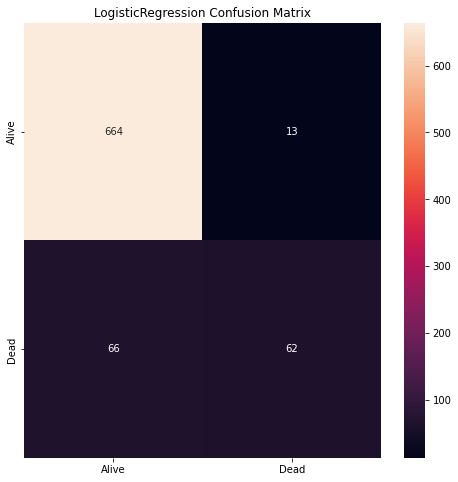



RandomForestClassifier Stats
Train Accuracy Score: 100.0
Test Accuracy Score: 90.6832298136646
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       677
           1       0.84      0.52      0.64       128

    accuracy                           0.91       805
   macro avg       0.88      0.75      0.79       805
weighted avg       0.90      0.91      0.90       805



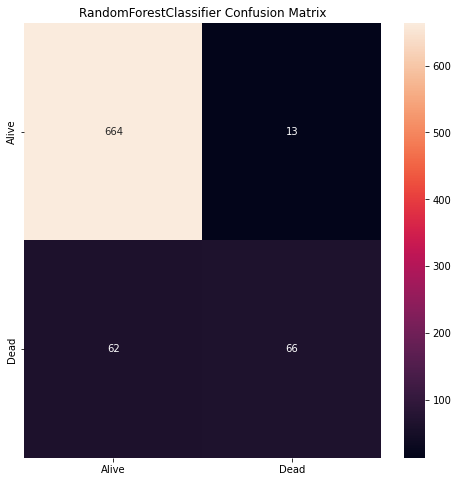



DecisionTreeClassifier Stats
Train Accuracy Score: 100.0
Test Accuracy Score: 84.59627329192546
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       677
           1       0.52      0.51      0.51       128

    accuracy                           0.85       805
   macro avg       0.71      0.71      0.71       805
weighted avg       0.84      0.85      0.85       805



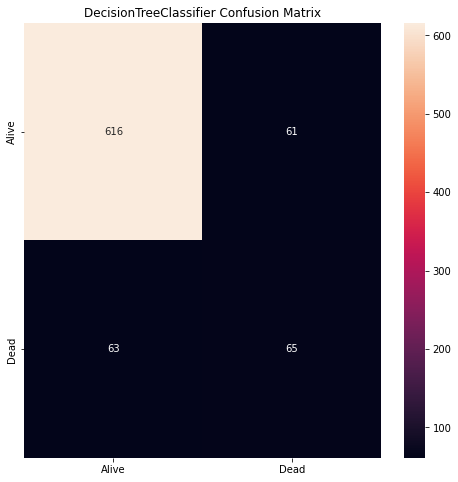



KNeighborsClassifier Stats
Train Accuracy Score: 90.73958980733374
Test Accuracy Score: 89.19254658385093
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       677
           1       0.79      0.44      0.56       128

    accuracy                           0.89       805
   macro avg       0.85      0.71      0.75       805
weighted avg       0.88      0.89      0.88       805



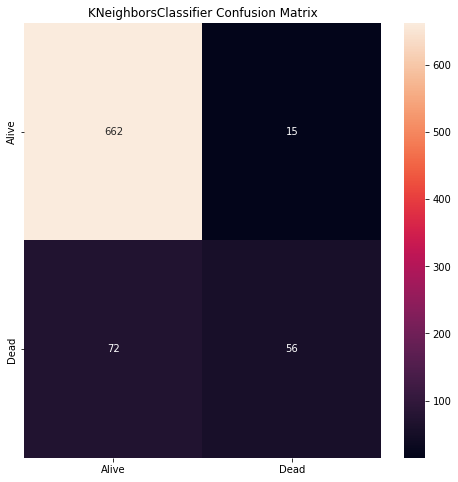



SVC Stats
Train Accuracy Score: 88.9683032939714
Test Accuracy Score: 88.81987577639751
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       677
           1       0.82      0.38      0.52       128

    accuracy                           0.89       805
   macro avg       0.86      0.68      0.73       805
weighted avg       0.88      0.89      0.87       805



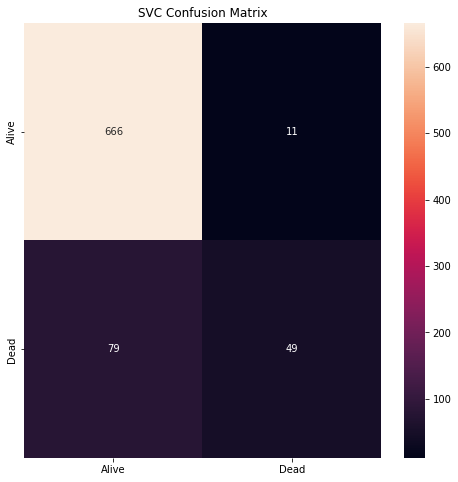



GradientBoostingClassifier Stats
Train Accuracy Score: 92.75947793660659
Test Accuracy Score: 90.55900621118013
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       677
           1       0.80      0.55      0.65       128

    accuracy                           0.91       805
   macro avg       0.86      0.76      0.80       805
weighted avg       0.90      0.91      0.90       805



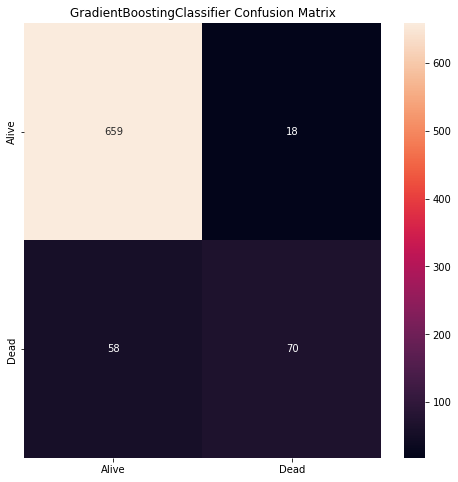



XGBRFClassifier Stats
Train Accuracy Score: 90.95711622125545
Test Accuracy Score: 90.43478260869566
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       677
           1       0.81      0.52      0.64       128

    accuracy                           0.90       805
   macro avg       0.86      0.75      0.79       805
weighted avg       0.90      0.90      0.90       805



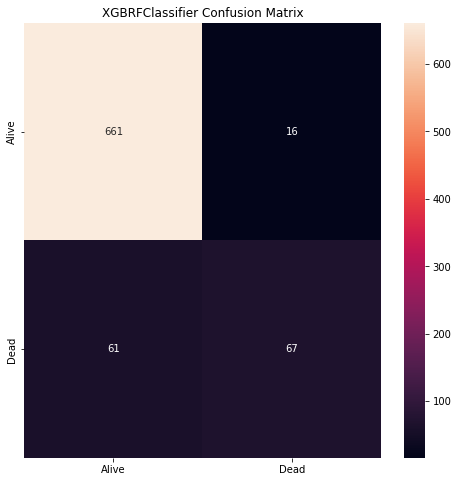



LGBMClassifier Stats
Train Accuracy Score: 97.20323182100684
Test Accuracy Score: 90.31055900621118
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       677
           1       0.80      0.52      0.63       128

    accuracy                           0.90       805
   macro avg       0.86      0.75      0.79       805
weighted avg       0.90      0.90      0.89       805



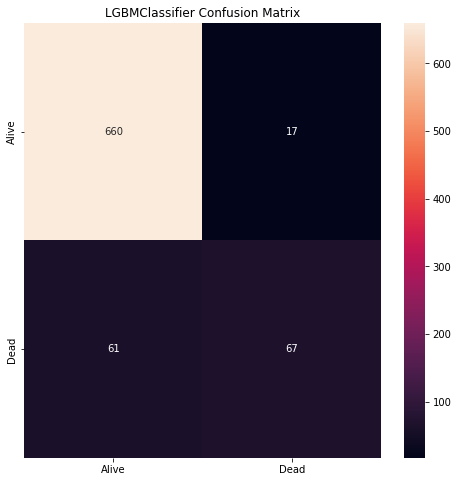



CatBoostClassifier Stats
Train Accuracy Score: 95.15226848974518
Test Accuracy Score: 90.80745341614906
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       677
           1       0.84      0.52      0.64       128

    accuracy                           0.91       805
   macro avg       0.88      0.75      0.80       805
weighted avg       0.90      0.91      0.90       805



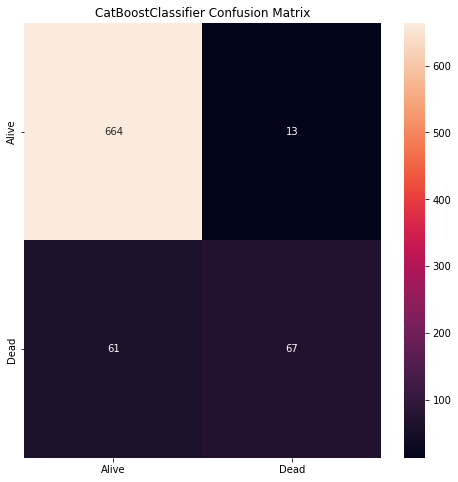



AdaBoostClassifier Stats
Train Accuracy Score: 90.58421379738968
Test Accuracy Score: 90.1863354037267
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       677
           1       0.76      0.55      0.64       128

    accuracy                           0.90       805
   macro avg       0.84      0.76      0.79       805
weighted avg       0.90      0.90      0.90       805



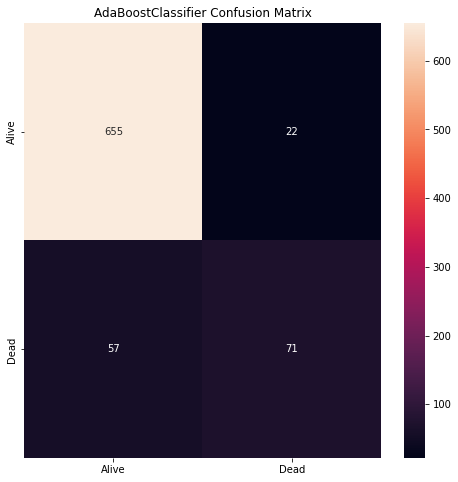



BaggingClassifier Stats
Train Accuracy Score: 98.72591671845868
Test Accuracy Score: 89.81366459627328
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       677
           1       0.79      0.48      0.60       128

    accuracy                           0.90       805
   macro avg       0.85      0.73      0.77       805
weighted avg       0.89      0.90      0.89       805



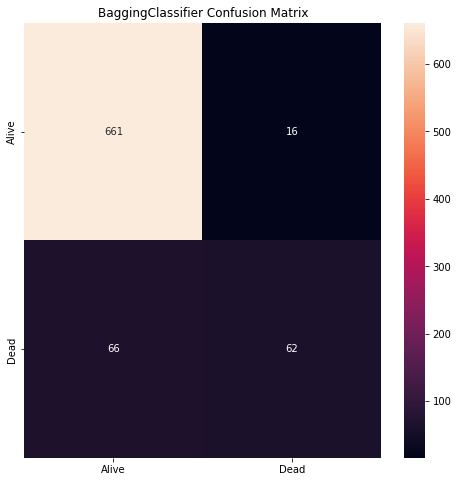

In [ ]:
LR = LogisticRegression().fit(X_train, y_train)
RFC = RandomForestClassifier().fit(X_train, y_train)
DTC = DecisionTreeClassifier().fit(X_train, y_train)
KNN = KNeighborsClassifier().fit(X_train, y_train)
SVM = SVC().fit(X_train, y_train)
GBC = GradientBoostingClassifier().fit(X_train, y_train)
XGBRF = XGBRFClassifier().fit(X_train, y_train)
LGB = LGBMClassifier().fit(X_train, y_train)
CBC = CatBoostClassifier().fit(X_train, y_train, verbose=0)
Ada = AdaBoostClassifier().fit(X_train, y_train)
BC = BaggingClassifier().fit(X_train, y_train)
model_list = [LR, RFC, DTC, KNN, SVM, GBC, XGBRF, LGB, CBC, Ada, BC]
for model in model_list:
  model_eval(model, X_train, y_train, X_test, y_test)

As we can see, there's a problem caused by class imbalance, where the performance of the classifier is generally good on the 0 (Alive) class, but very poor on the 1 (Dead) class, meaning that models can't confidently perdict whether the person will die of the cancer or not. This observation is demonstrated while looking at the percision, recall and F1-score of the different models.

# Modeling with Oversampling



In this section the problem of class imbalance will be fixed by using sampling. Furthermore, we will optimize the different models via a custom made class that is intended to look for the different hyper parameter combinations in order to achieve best performance.

In [14]:
#for optimization purposes
class GridSearch:


  def __init__(self, model, parameter_grid):
    self.model = model
    self.parameter_grid = parameter_grid
    self.best_model_ = None
    self.best_params_ = dict()
  
  def generate_permutations(self):
    keys = self.parameter_grid.keys()
    vals = self.parameter_grid.values()
    for instance in itertools.product(*vals):
        yield dict(zip(keys, instance))

  def fit_test(self, X_train, y_train, X_test, y_test):
    dummy = list(self.generate_permutations())
    keys = list(dummy[0].keys())
    best_score = 0.0
    scores = []
    for para in dummy:
      self.model.set_params(**para)
      self.model.fit(X_train, y_train)
      score = self.model.score(X_test, y_test)
      scores.append(score)
      if score >= best_score:
        best_score = score
        self.best_params_ = self.model.get_params(deep=False)
        self.best_model_ = copy.deepcopy(self.model)
    self.plot_curve(scores)

  def plot_curve(self,scores):
    fig = px.line(
        pd.DataFrame({
            'Iterations': range(len(scores)),
            'Scores': scores
        }),
        x='Iterations',
        y='Scores',
        template="plotly_dark",
        width=800, height=500)
    fig.update_layout(title={
        'text': f'{type(self.model).__name__} Model Accuracy Graph',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
    fig.show(renderer="svg")

For sampling random over sampling is used, which intendes to increase the size of the minority class in the dataset.

In [15]:
ros = RandomOverSampler(random_state=0)
X_sampled, y_sampled = ros.fit_resample(X, y)

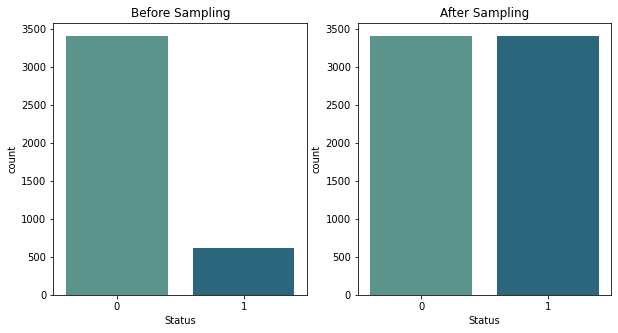

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Before Sampling')
sns.countplot(y, palette='crest')
plt.subplot(1,2,2)
plt.title('After Sampling')
sns.countplot(y_sampled, palette='crest')
plt.show()

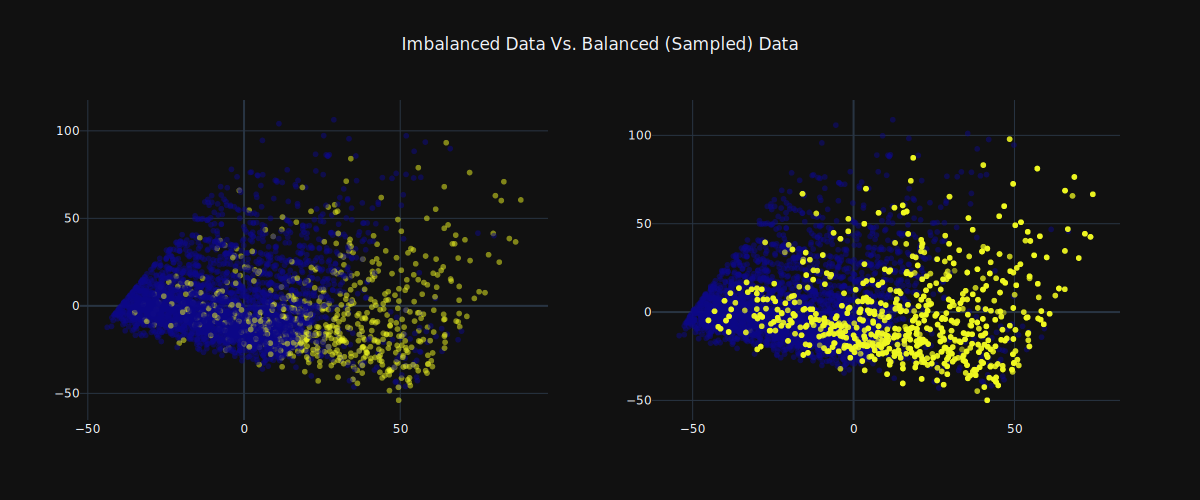

In [ ]:
#visulization of data before and after sampling
# create pca object
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_sampled_pca = pca.fit_transform(X_sampled)

pca_df = pd.DataFrame({
    'comp_1': X_pca[:,0],
    'comp_2': X_pca[:,1],
    'target': y
})
pca_sampled_df = pd.DataFrame({
    'comp_1': X_sampled_pca[:,0],
    'comp_2': X_sampled_pca[:,1],
    'target': y_sampled
})

figure1 = px.scatter(x=pca_df['comp_1'], y=pca_df['comp_2'], color=pca_df['target'], opacity=0.5)
figure2 = px.scatter(x=pca_sampled_df['comp_1'], y=pca_sampled_df['comp_2'], color=pca_sampled_df['target'], opacity=0.5)

figure1_traces = []
figure2_traces = []
for trace in range(len(figure1["data"])):
    figure1_traces.append(figure1["data"][trace])
for trace in range(len(figure2["data"])):
    figure2_traces.append(figure2["data"][trace])


this_figure = sp.make_subplots(rows=1, cols=2) 


for traces in figure1_traces:
    this_figure.append_trace(traces, row=1, col=1)
for traces in figure2_traces:
    this_figure.append_trace(traces, row=1, col=2)

this_figure.update(layout_coloraxis_showscale=False)

this_figure.update_layout(title_text='Imbalanced Data Vs. Balanced (Sampled) Data', title_x=0.5, width=1200, height=500,template="plotly_dark")

this_figure.show(renderer='svg')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)

1 - Logistic Regression

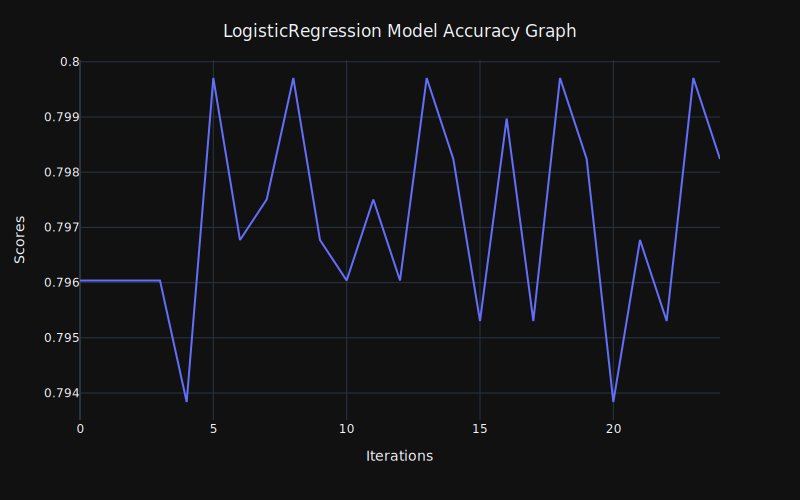

In [ ]:
logistic_parameter_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
logistic_grid_search = GridSearch(LogisticRegression(), logistic_parameter_grid)
logistic_grid_search.fit_test(X_train, y_train, X_test, y_test)

In [ ]:
LR = logistic_grid_search.best_model_



LogisticRegression Stats
Train Accuracy Score: 79.52669235002752
Test Accuracy Score: 79.97065297138664
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       669
           1       0.81      0.79      0.80       694

    accuracy                           0.80      1363
   macro avg       0.80      0.80      0.80      1363
weighted avg       0.80      0.80      0.80      1363



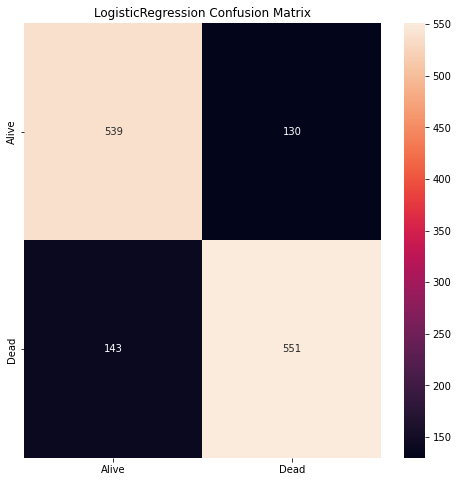

In [ ]:
model_eval(LR, X_train, y_train, X_test, y_test)

2 - Random Forest Classifier

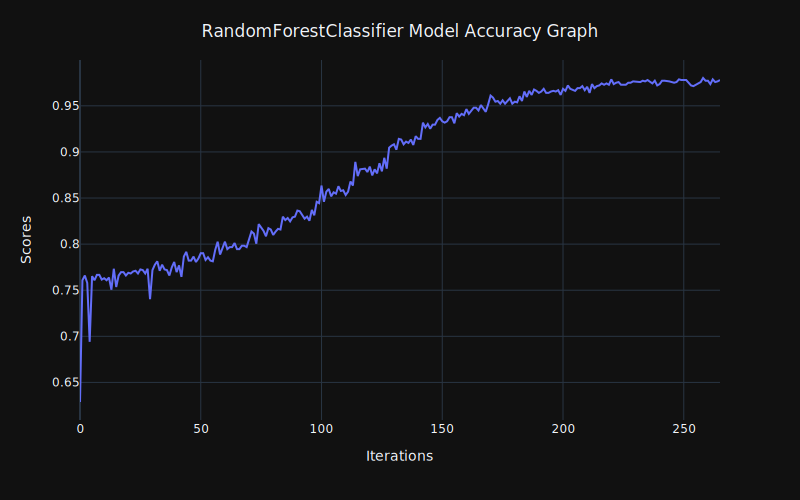

In [ ]:
random_forest_parameter_grid = {
        'max_depth': range(1,20),
        'n_estimators': np.arange(10,150,20),
        'class_weight': ['balanced', 'balanced_subsample']

    }
random_forest_grid_search = GridSearch(RandomForestClassifier(), random_forest_parameter_grid)
random_forest_grid_search.fit_test(X_train, y_train, X_test, y_test)

In [ ]:
RFC = random_forest_grid_search.best_model_

In [ ]:
random_forest_grid_search.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}



RandomForestClassifier Stats
Train Accuracy Score: 100.0
Test Accuracy Score: 98.01907556859868
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       669
           1       0.97      0.99      0.98       694

    accuracy                           0.98      1363
   macro avg       0.98      0.98      0.98      1363
weighted avg       0.98      0.98      0.98      1363



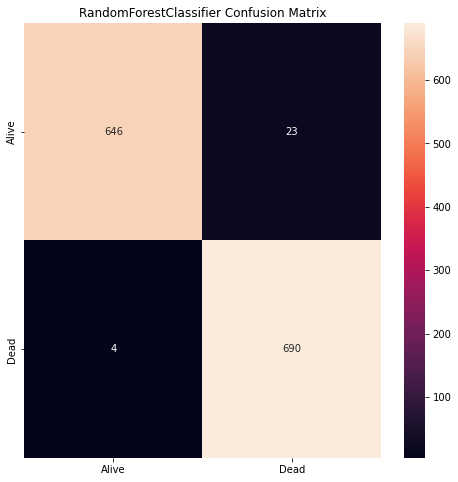

In [ ]:
model_eval(RFC, X_train, y_train, X_test, y_test)

3 - Decision Tree Classifier

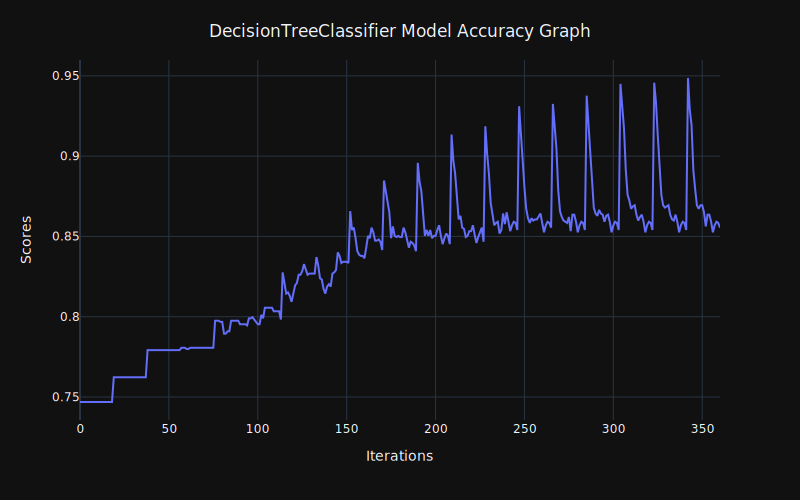

In [ ]:
decision_tree_parameter_grid = {
        'max_depth': range(1,20),
        'min_samples_leaf': range(1,20)
    }
decision_tree_grid_search = GridSearch(DecisionTreeClassifier(), decision_tree_parameter_grid)
decision_tree_grid_search.fit_test(X_train, y_train, X_test, y_test)

In [ ]:
DTC = decision_tree_grid_search.best_model_



DecisionTreeClassifier Stats
Train Accuracy Score: 99.83489268024216
Test Accuracy Score: 94.86426999266324
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       669
           1       0.91      1.00      0.95       694

    accuracy                           0.95      1363
   macro avg       0.95      0.95      0.95      1363
weighted avg       0.95      0.95      0.95      1363



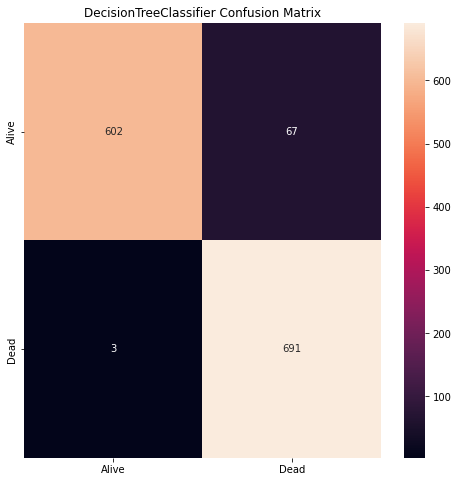

In [ ]:
model_eval(DTC, X_train, y_train, X_test, y_test)

4 - KNN

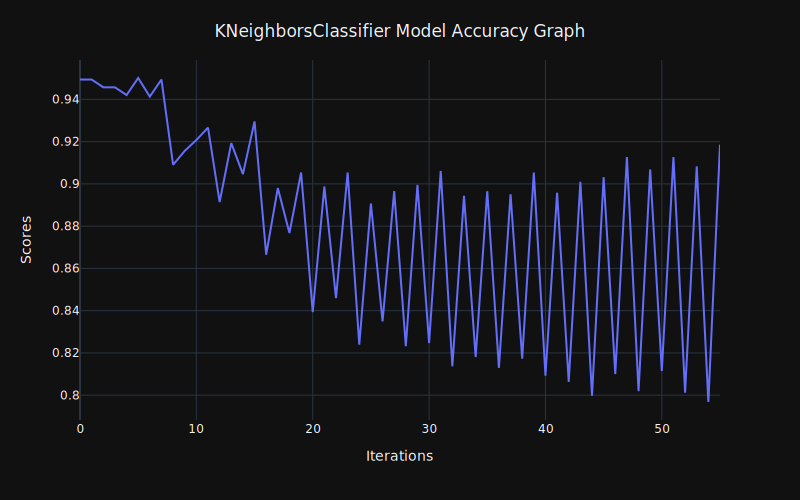

In [ ]:
KNN_parameter_grid = {
        'n_neighbors': range(1,15),
        'metric': ['minkowski', 'manhattan'],
        'weights': ['uniform', 'distance']
    }
KNN_grid_search = GridSearch(KNeighborsClassifier(), KNN_parameter_grid)
KNN_grid_search.fit_test(X_train, y_train, X_test, y_test)

In [ ]:
KNN = KNN_grid_search.best_model_



KNeighborsClassifier Stats
Train Accuracy Score: 100.0
Test Accuracy Score: 95.01100513573
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       669
           1       0.91      1.00      0.95       694

    accuracy                           0.95      1363
   macro avg       0.95      0.95      0.95      1363
weighted avg       0.95      0.95      0.95      1363



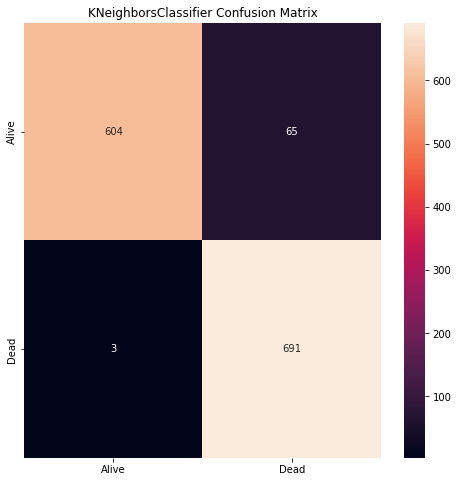

In [ ]:
model_eval(KNN, X_train, y_train, X_test, y_test)

5 - SVM

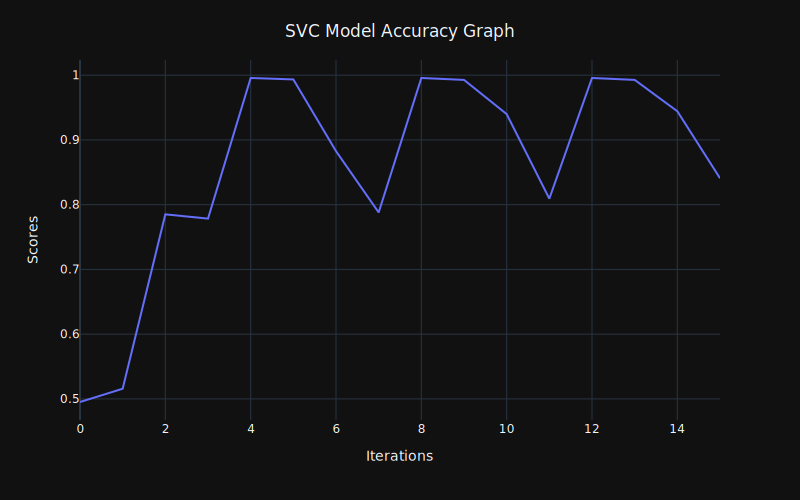

In [ ]:
SVM_parameter_grid = {
         'C': [0.1,1, 10, 100], 
         'gamma': [1,0.1,0.01,0.001]
         }
SVM_grid_search = GridSearch(SVC(), SVM_parameter_grid)
SVM_grid_search.fit_test(X_train, y_train, X_test, y_test)

In [ ]:
SVC = SVM_grid_search.best_model_



SVC Stats
Train Accuracy Score: 100.0
Test Accuracy Score: 99.55979457079971
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       669
           1       1.00      0.99      1.00       694

    accuracy                           1.00      1363
   macro avg       1.00      1.00      1.00      1363
weighted avg       1.00      1.00      1.00      1363



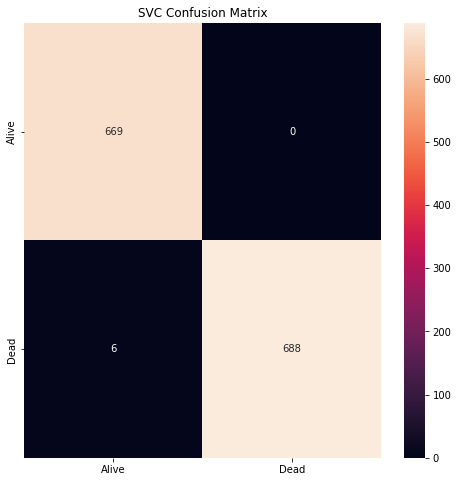

In [ ]:
model_eval(SVC, X_train, y_train, X_test, y_test)

In [ ]:
SVM_grid_search.best_params_

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

6 - Gradient Boosting Classifier

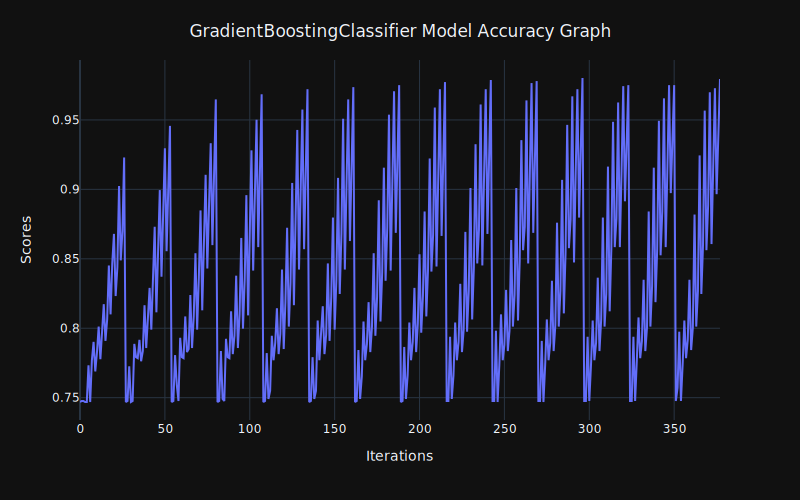

In [ ]:
GBC_parameter_grid = {
         'n_estimators': np.arange(10,150,10), 
         'max_depth': range(1,10),
         'learning_rate': [0.001, 0.01, 0.1]
         }
GBC_grid_search = GridSearch(GradientBoostingClassifier(), GBC_parameter_grid)
GBC_grid_search.fit_test(X_train, y_train, X_test, y_test)

In [ ]:
GBC = GBC_grid_search.best_model_



GradientBoostingClassifier Stats
Train Accuracy Score: 100.0
Test Accuracy Score: 98.01907556859868
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       669
           1       0.96      1.00      0.98       694

    accuracy                           0.98      1363
   macro avg       0.98      0.98      0.98      1363
weighted avg       0.98      0.98      0.98      1363



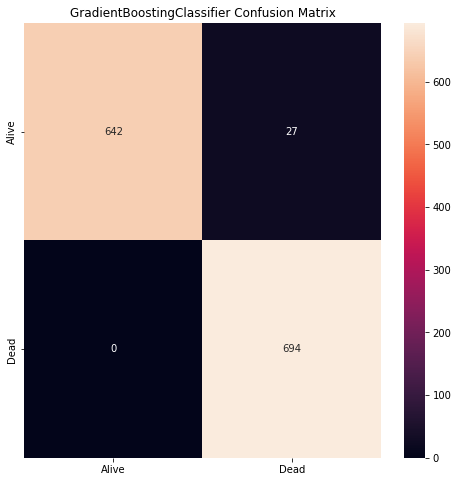

In [ ]:
model_eval(GBC, X_train, y_train, X_test, y_test)

In [ ]:
GBC_grid_search.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 110,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

7 - XGBRF

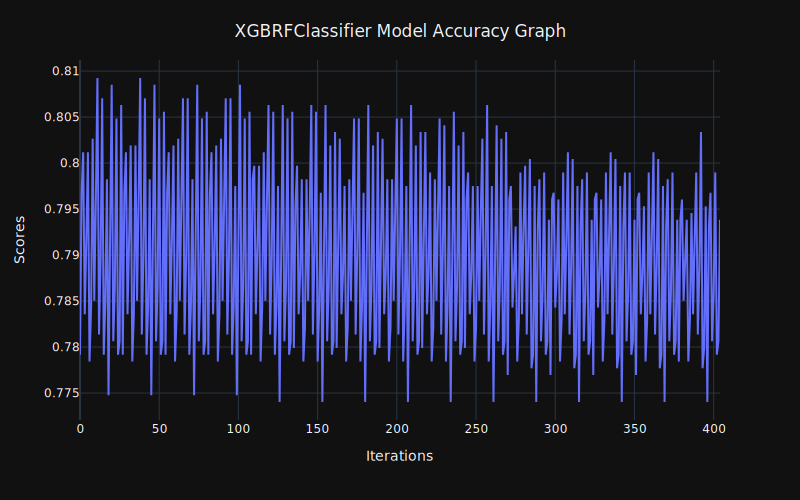

In [ ]:
XGBRF_parameter_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
XGBRF_grid_search = GridSearch(XGBRFClassifier(), XGBRF_parameter_grid)
XGBRF_grid_search.fit_test(X_train, y_train, X_test, y_test)

In [ ]:
XGBRF = XGBRF_grid_search.best_model_



XGBRFClassifier Stats
Train Accuracy Score: 82.24179049715649
Test Accuracy Score: 80.92443140132062
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       669
           1       0.88      0.72      0.79       694

    accuracy                           0.81      1363
   macro avg       0.82      0.81      0.81      1363
weighted avg       0.82      0.81      0.81      1363



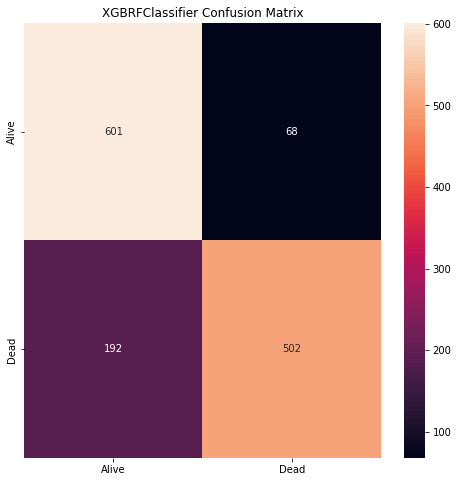

In [ ]:
model_eval(XGBRF, X_train, y_train, X_test, y_test)

8 - LGBM

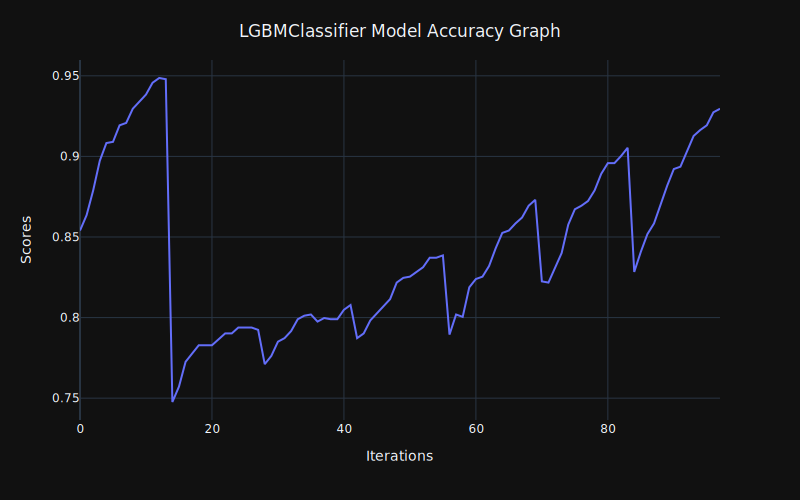

In [ ]:
LGBM_parameter_grid = {
        'max_depth': [-1, 1, 2, 3, 4, 5, 6],
        'n_estimators': np.arange(10,150,10)
        }
LGBM_grid_search = GridSearch(LGBMClassifier(), LGBM_parameter_grid)
LGBM_grid_search.fit_test(X_train, y_train, X_test, y_test)

In [ ]:
LGBM = LGBM_grid_search.best_model_



LGBMClassifier Stats
Train Accuracy Score: 98.49568886442854
Test Accuracy Score: 94.86426999266324
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       669
           1       0.93      0.97      0.95       694

    accuracy                           0.95      1363
   macro avg       0.95      0.95      0.95      1363
weighted avg       0.95      0.95      0.95      1363



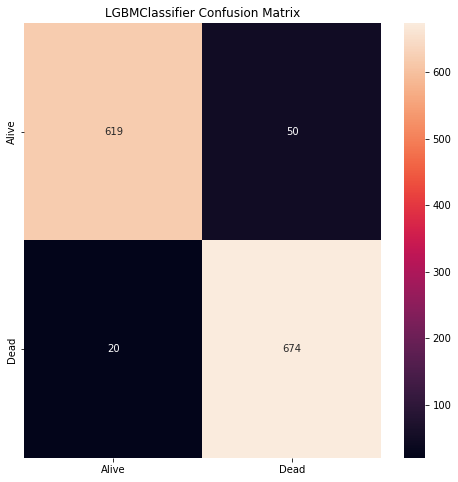

In [ ]:
model_eval(LGBM, X_train, y_train, X_test, y_test)

9 - Ada

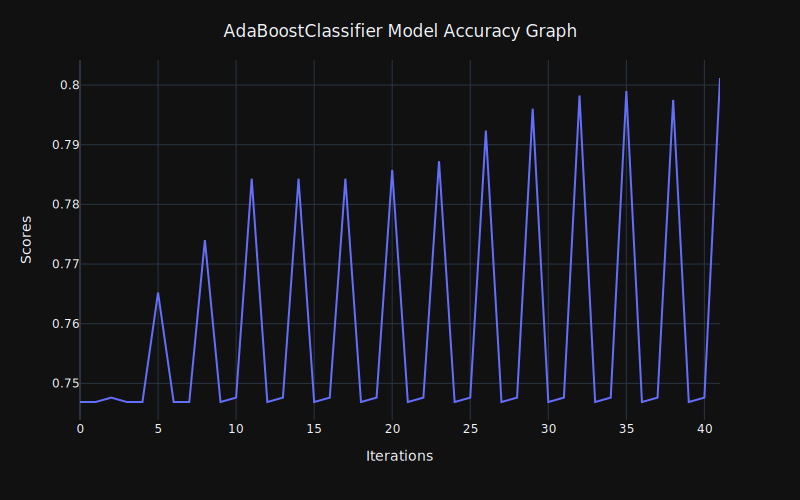

In [ ]:
Ada_parameter_grid = {
    "n_estimators": np.arange(10,150,10),
    'learning_rate': [0.001, 0.01, 0.1]
    }
Ada_grid_search = GridSearch(AdaBoostClassifier(), Ada_parameter_grid)
Ada_grid_search.fit_test(X_train, y_train, X_test, y_test)

In [ ]:
Ada = Ada_grid_search.best_model_



AdaBoostClassifier Stats
Train Accuracy Score: 80.00366905155018
Test Accuracy Score: 80.11738811445342
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       669
           1       0.86      0.72      0.79       694

    accuracy                           0.80      1363
   macro avg       0.81      0.80      0.80      1363
weighted avg       0.81      0.80      0.80      1363



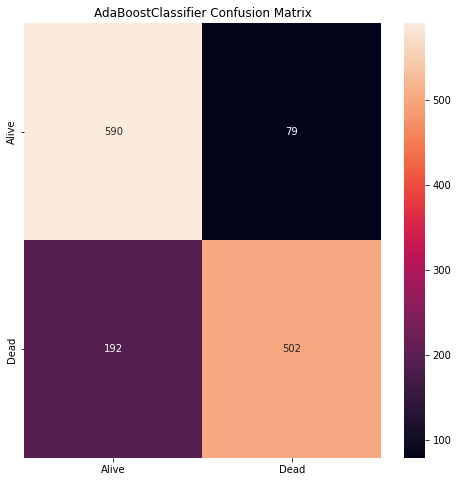

In [ ]:
model_eval(Ada, X_train, y_train, X_test, y_test)

10 - Bagging Classifier

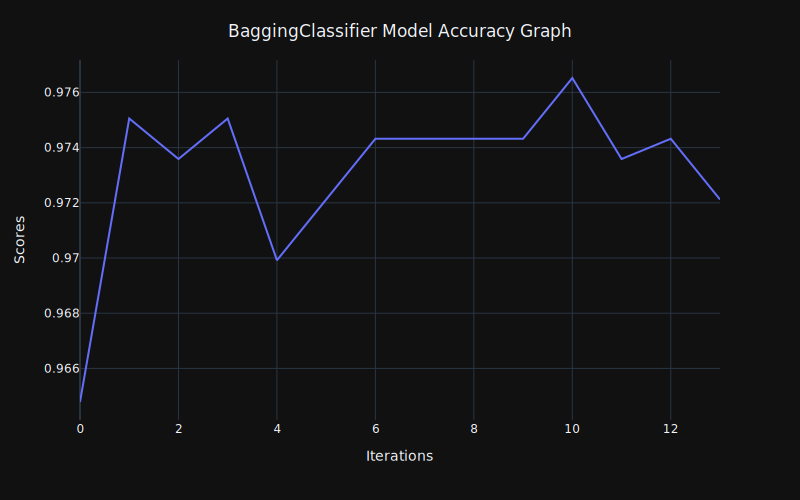

In [ ]:
BC_parameter_grid = {
    'n_estimators': np.arange(10,150,10),
    }
BC_grid_search = GridSearch(BaggingClassifier(), BC_parameter_grid)
BC_grid_search.fit_test(X_train, y_train, X_test, y_test)

In [ ]:
BC = BC_grid_search.best_model_



BaggingClassifier Stats
Train Accuracy Score: 99.98165474224912
Test Accuracy Score: 97.65223771093177
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       669
           1       0.96      1.00      0.98       694

    accuracy                           0.98      1363
   macro avg       0.98      0.98      0.98      1363
weighted avg       0.98      0.98      0.98      1363



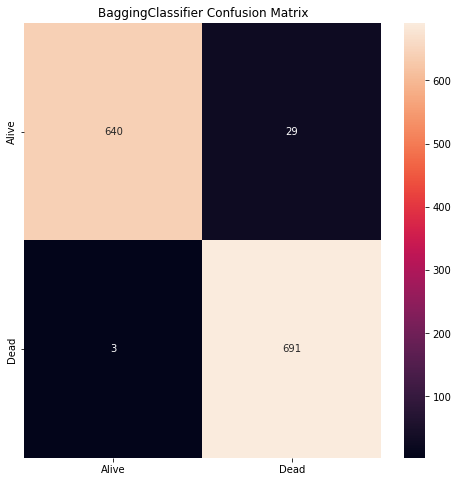

In [ ]:
model_eval(BC, X_train, y_train, X_test, y_test)

In [ ]:
BC_grid_search.best_params_

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 110,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Probability of a Prediction

Having a prediction to tell whether the model thinks the patient will survive or not is good, but let's take it a step further and also output the confiednce of the model in its prediction. A common approach to output such probability is to use predict_proba from sklearn on a fitted model, the problem with this is if the model is not callibrated, the output prediction probability will not be accurate.
Thusly, we need to first check if the best performing model thus far (support vector machine model) is well calibrated, as SVMs tend to not be callibrated.

In [ ]:
#fitting the model using the hyper parameters obtained in the optimization
SVM = SVC(C=100, gamma=1, probability=True)
SVM.fit(X_train, y_train)

SVC(C=100, gamma=1, probability=True)

## Calibration Curve and Expected Calibration Error

Here we will first plot the claibration curve which tells us how close the probabilities of the model are close to the expected probability. Then we will calculate the expected calibration error which answers the question how far away is our predicted probability from the true probability, on average?

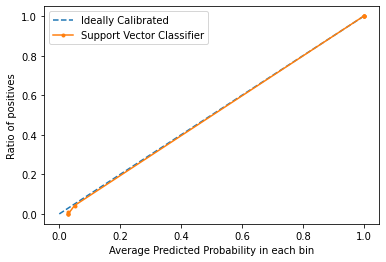

In [ ]:
prob = SVM.decision_function(X_test)
 
# Creating Calibration Curve
x_curve, y_curve = calibration_curve(y_test, prob, n_bins = 10, strategy='quantile',normalize = True)
 
# Plot calibration curve
 
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
# Plot model's calibration curve
plt.plot(y_curve, x_curve, marker = '.', label = 'Support Vector Classifier')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

As we can see the model (orange line) is close to the ideal calibration (dashed line), therefor we can see that the model is well calibrated.

In [ ]:
def expected_calibration_error(y, proba, bins = 'fd'):
  bin_count, bin_edges = np.histogram(proba, bins = bins)
  n_bins = len(bin_count)
  bin_edges[0] -= 1e-8 # because left edge is not included
  bin_id = np.digitize(proba, bin_edges, right = True) - 1
  bin_ysum = np.bincount(bin_id, weights = y, minlength = n_bins)
  bin_probasum = np.bincount(bin_id, weights = proba, minlength = n_bins)
  bin_ymean = np.divide(bin_ysum, bin_count, out = np.zeros(n_bins), where = bin_count > 0)
  bin_probamean = np.divide(bin_probasum, bin_count, out = np.zeros(n_bins), where = bin_count > 0)
  ece = np.abs((bin_probamean - bin_ymean) * bin_count).sum() / len(proba)
  return ece

In [ ]:
print(expected_calibration_error(y_test, prob))

0.318427485796881


This 0.3 tell us that on average the probability of the prediction of the model is off by only 0.3% from its actual value, which is pretty good!

# The Best Model with Predictions and Probabilities



SVC Stats
Train Accuracy Score: 100.0
Test Accuracy Score: 99.55979457079971
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       669
           1       1.00      0.99      1.00       694

    accuracy                           1.00      1363
   macro avg       1.00      1.00      1.00      1363
weighted avg       1.00      1.00      1.00      1363



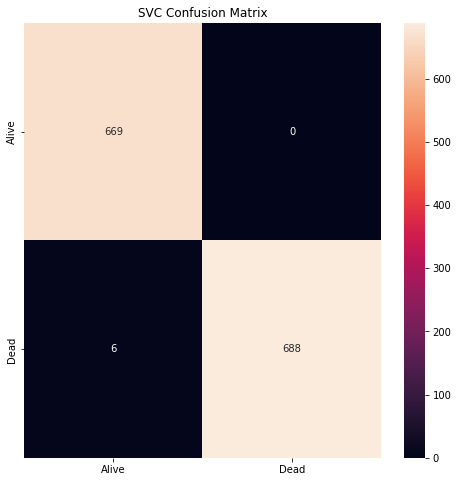

In [22]:
SVM = SVC(C= 100, gamma= 1)
SVM.fit(X_train, y_train)
model_eval(SVM, X_train, y_train, X_test, y_test)

In [ ]:
#we pull 20 random images from the test data set and make predictions on them
_ = 0
for i in np.random.randint(0,len(X_test),16): 
    actual = y_test.iloc[i]
    prediction = SVM.predict([X_test.iloc[i]])[0]
    prediction_conf = round(np.amax(SVM.predict_proba([X_test.iloc[i]]))*100, 3)
    if actual != prediction:
      _ += 1
    print('Actual: '+ str(actual) + '\t\t\t' + 'Prediction: '+ str(prediction) + '\t\t\t' + 'Prediction Confidence: ' +str(prediction_conf)+'%')
print(f'The model got {_} out of 20 wrong')

Actual: 0			Prediction: 0			Prediction Confidence: 98.176%
Actual: 0			Prediction: 0			Prediction Confidence: 98.176%
Actual: 1			Prediction: 1			Prediction Confidence: 100.0%
Actual: 0			Prediction: 0			Prediction Confidence: 98.176%
Actual: 0			Prediction: 0			Prediction Confidence: 98.176%
Actual: 1			Prediction: 1			Prediction Confidence: 100.0%
Actual: 0			Prediction: 0			Prediction Confidence: 98.176%
Actual: 0			Prediction: 0			Prediction Confidence: 98.176%
Actual: 1			Prediction: 1			Prediction Confidence: 100.0%
Actual: 0			Prediction: 0			Prediction Confidence: 98.176%
Actual: 0			Prediction: 0			Prediction Confidence: 98.176%
Actual: 0			Prediction: 0			Prediction Confidence: 98.176%
Actual: 1			Prediction: 1			Prediction Confidence: 100.0%
Actual: 0			Prediction: 0			Prediction Confidence: 98.176%
Actual: 0			Prediction: 0			Prediction Confidence: 98.176%
Actual: 0			Prediction: 0			Prediction Confidence: 98.176%
The model got 0 out of 20 wrong
